# DS NN Training

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras import backend as K # Tensorflow
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import os, fnmatch
import seaborn as sns
import matplotlib.pyplot as plt

C:\Secondary_Program_Folder\envs\DeepLearningLearning1\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Step 1: Read data

In [2]:
def read_data_set(data_set, pattern):
    list_ = []
    pin_id = ['1','2','3','4','5','6','7','8'] # Electrode(Pin) id names
    # Find Measurement(x).csv files in folder =======================================
    directory = os.listdir(directory_path)# Import directory's file names
    sum_files = 0
    files = [] # Create the list of Measurement files
    for file in directory:
        if fnmatch.fnmatch(file, pattern): # Check if True -> "file.pattern"
            data = pd.read_csv(directory_path+"\\"+file, delimiter=',', header=None)
            data.index = pin_id # Chenge index pin id number
            list_.append(data) # Put all data in a list for later use
            files.append(file) # 
            sum_files += 1 
    data_set = pd.concat(list_)# Make the list a dataframe
    data_set.columns = ['50khZ','100khZ','150khZ','200khZ','250khZ','300khZ','350khZ','400khZ','450khZ','500khZ']
    data_set.index.name = 'Pin'
    print ("Size of DataFrame:", data_set.shape)
    print ('Path: ',directory_path)
    print ('Imported files for Training :', files)
    return data_set

In [3]:
def read_diagnosis(data_set):
    directory = os.listdir(directory_path)# Import directory's file names
    file = 'Diagnosis.txt'
    if file in directory:
        data_set = pd.read_csv(directory_path+"\\"+file, header=None)
    return data_set.loc[0][0]

## Step 2: Create Training set from data

In [4]:
def train_data_handling(): 
    train_data_set = data_set.copy()
    # Change name of columns for easier optical distinction
    train_data_set.columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'y'] 
    
    mask = train_data_set['y'] == 'F10_300'
    train_data_set.loc[mask, 'y'] = 0
    mask = train_data_set['y'] == 'F30_900'
    train_data_set.loc[mask, 'y'] = 1
    
    #X: Input, Y: Output
    X, Y = train_data_set.drop('y', axis=1).values , train_data_set['y'].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    
    return train_data_set, X_train, X_test, Y_train, Y_test

## Step 3: Train NN

In [5]:
def train_NN(x,batch,l1,l2,l3,l4,r1,r2,a1,a2,a3,a4,ep):
    # Model, Layers
    model = Sequential()
    model.add(Dense(l1, input_dim=x, activation=a1))
    #model.add(Dense(r1, activity_regularizer=regularizers.l1(0.5))) # regularizer
    model.add(Dense(l2, activation=a2))
    #model.add(Dense(r2, activity_regularizer=regularizers.l1(0.3))) # regularizer
    model.add(Dense(l3, activation=a3))
    model.add(Dense(l4, activation=a4))
    # Model Train
    accuracy_train, accuracy_test = [], []
 
    # Model initialization
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']);
    history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), batch_size=batch, 
              epochs=ep, shuffle=True, verbose=0)
    # Model test, Evaluate=['loss','acc']
    score_train = model.evaluate(X_train, Y_train, batch_size=batch)
    score_test = model.evaluate(X_test, Y_test, batch_size=batch)
    accuracy_train = score_train[1]*100 # Keep scores for visual
    accuracy_test = score_test[1]*100 # Keep scores for visual
    
    print("\n%s: %.2f%%" % ('Train Accuracy', score_train[1]*100))
    print("%s: %.2f%%" % ('Test Accuracy', score_test[1]*100))
    print("%s: %.2f%%" % ('Difference: ', accuracy_train-accuracy_test))
    print('-------------')
    model.summary()
    return score_train, score_test, accuracy_train, accuracy_test, model, history

## Step 4: Visual

In [6]:
def visual(): 
    '''
    val_train = pd.DataFrame(accuracy_train)
    val_train['score_type'] = 'Train accuracy'
    val_test = pd.DataFrame(accuracy_test)
    val_test['score_type'] = 'Test accuracy'
    val = pd.concat([val_train, val_test])
    val.columns = ['Accuracy%', 'Error type']
    val.index.name = 'Iteration'
    
    fg1 = sns.pointplot(x=val.index, y='Accuracy%', data=val, hue='Error type')
    plt.show()
    '''
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    
    return 

# MAIN PROGRAM

## Step 1

In [7]:
# Step1: Read & Manipulate data
data_set = pd.DataFrame()

directory_path = 'C:\\Users\\Alex\\Desktop\\DS DNN basic functions\\10_300'
data_set_1 = read_data_set(data_set, pattern = '*.csv')
data_set_1['Diagnosis'] = read_diagnosis(data_set)

directory_path = 'C:\\Users\\Alex\\Desktop\\DS DNN basic functions\\30_900'
data_set_2 = read_data_set(data_set, pattern = '*.csv')
data_set_2['Diagnosis'] = read_diagnosis(data_set)

data_set = pd.concat([data_set_1, data_set_2])

data_set.head()
#display(data_set) # only jupyter notebook

Size of DataFrame: (2400, 10)
Path:  C:\Users\Alex\Desktop\DS DNN basic functions\10_300
Imported files for Training : ['Meas (0).csv', 'Meas (1).csv', 'Meas (10).csv', 'Meas (100).csv', 'Meas (101).csv', 'Meas (102).csv', 'Meas (103).csv', 'Meas (104).csv', 'Meas (105).csv', 'Meas (106).csv', 'Meas (107).csv', 'Meas (108).csv', 'Meas (109).csv', 'Meas (11).csv', 'Meas (110).csv', 'Meas (111).csv', 'Meas (112).csv', 'Meas (113).csv', 'Meas (114).csv', 'Meas (115).csv', 'Meas (116).csv', 'Meas (117).csv', 'Meas (118).csv', 'Meas (119).csv', 'Meas (12).csv', 'Meas (120).csv', 'Meas (121).csv', 'Meas (122).csv', 'Meas (123).csv', 'Meas (124).csv', 'Meas (125).csv', 'Meas (126).csv', 'Meas (127).csv', 'Meas (128).csv', 'Meas (129).csv', 'Meas (13).csv', 'Meas (130).csv', 'Meas (131).csv', 'Meas (132).csv', 'Meas (133).csv', 'Meas (134).csv', 'Meas (135).csv', 'Meas (136).csv', 'Meas (137).csv', 'Meas (138).csv', 'Meas (139).csv', 'Meas (14).csv', 'Meas (140).csv', 'Meas (141).csv', 'Meas (

,50khZ,100khZ,150khZ,200khZ,250khZ,300khZ,350khZ,400khZ,450khZ,500khZ,Diagnosis
Pin,,,,,,,,,,,
1,18,34,33,88,95,180,105,200,252,220,F10_300
2,16,58,69,84,145,114,189,224,216,240,F10_300
3,26,30,66,64,145,114,210,120,153,110,F10_300
4,30,44,78,92,130,156,98,128,126,170,F10_300
5,25,46,69,84,105,156,210,104,243,150,F10_300


## Step 2

In [8]:
# Step2: Data Handling for NN Model
# If diagnosis is F10_300: Output(y)=0, If diagnosis is F30_900: Output(y)=1
train_data_set = pd.DataFrame()
train_data_set, X_train, X_test, Y_train, Y_test = train_data_handling()
print ('Training set size:', X_train.size+Y_train.size)
print ('Test set size:', X_test.size+Y_test.size)
#display(train_data_set) # only for Jupyter

Training set size: 35376
Test set size: 17424


## Step 3&4

In [9]:
K.clear_session() # Clear previous "model" parameters, for testing
del model

NameError: name 'model' is not defined

  32/1584 [..............................] - ETA: 0s
Train Accuracy: 100.00%
Test Accuracy: 100.00%
Difference: : 0.00%
-------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


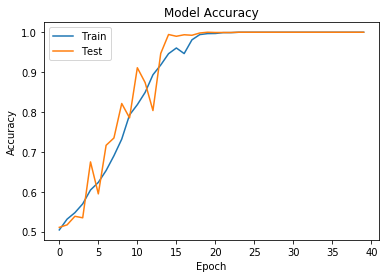

In [10]:
# Step3: Train NN Model 
# x:Input dimesnsions, l:Layer size, a:Activation function, ep:Epochs
input_shape = X_train.shape[1]
score_train, score_test, accuracy_train, accuracy_test, model, history = train_NN( 
    x=input_shape, batch=32, ep=40,
    l1=8, r1=0, l2=3, r2=0, l3=2, l4=1,
    a1='relu', a2='linear', a3='linear', a4='sigmoid')
# Step4: Visual NN's Train and Test accuracy
visual() 

## Prediction using the Test Set

In [11]:
# Classify all values in "TEST Data Set"
# Check if prediction is the same as the Test set actual output
correct = 0 

for i in range(X_test.shape[0]):
    data = np.array(X_test[i])
    data = np.reshape(data, (1,input_shape)) # input_shape: see previous step
    prediction = model.predict(data)
    if prediction>=0.5: p = 1 # P: Variable to save prediction as integer
    if prediction<0.5: p = 0
    print ('Pred:', p, ' Y:', Y_test[i], '|', prediction)
    if p==Y_test[i]: correct += 1 
        
#K.clear_session() # Clear model's parameters
    
print('Correctly Classified samples: ', correct)
print('From a total number of %s' %X_test.shape[0]) 
print('\nClassifier Accuracy \non Test Data Set: %.2f%%' %( (correct/X_test.shape[0])*100) )


Pred: 0  Y: 0 | [[0.23540835]]
Pred: 1  Y: 1 | [[0.9529555]]
Pred: 1  Y: 1 | [[0.97132033]]
Pred: 1  Y: 1 | [[0.9115692]]
Pred: 0  Y: 0 | [[0.1668376]]
Pred: 0  Y: 0 | [[0.22199614]]
Pred: 1  Y: 1 | [[0.92238265]]
Pred: 0  Y: 0 | [[0.1714891]]
Pred: 1  Y: 1 | [[0.74686813]]
Pred: 0  Y: 0 | [[0.14185601]]
Pred: 1  Y: 1 | [[0.95819664]]
Pred: 1  Y: 1 | [[0.984176]]
Pred: 1  Y: 1 | [[0.9307604]]
Pred: 0  Y: 0 | [[0.16221079]]
Pred: 0  Y: 0 | [[0.2530219]]
Pred: 0  Y: 0 | [[0.11315774]]
Pred: 1  Y: 1 | [[0.9802145]]
Pred: 0  Y: 0 | [[0.10402633]]
Pred: 1  Y: 1 | [[0.9486353]]
Pred: 1  Y: 1 | [[0.9329748]]
Pred: 0  Y: 0 | [[0.15548481]]
Pred: 0  Y: 0 | [[0.22495583]]
Pred: 1  Y: 1 | [[0.9744543]]
Pred: 1  Y: 1 | [[0.90950495]]
Pred: 0  Y: 0 | [[0.18360138]]
Pred: 1  Y: 1 | [[0.9588036]]
Pred: 1  Y: 1 | [[0.9138138]]
Pred: 0  Y: 0 | [[0.22864664]]
Pred: 1  Y: 1 | [[0.9877394]]
Pred: 0  Y: 0 | [[0.16876386]]
Pred: 1  Y: 1 | [[0.9574594]]
Pred: 1  Y: 1 | [[0.98494637]]
Pred: 0  Y: 0 | [[0.2183

Pred: 1  Y: 1 | [[0.97338593]]
Pred: 1  Y: 1 | [[0.9571882]]
Pred: 1  Y: 1 | [[0.6955526]]
Pred: 0  Y: 0 | [[0.21405469]]
Pred: 0  Y: 0 | [[0.24387366]]
Pred: 1  Y: 1 | [[0.9553636]]
Pred: 1  Y: 1 | [[0.9345459]]
Pred: 1  Y: 1 | [[0.85300106]]
Pred: 0  Y: 0 | [[0.16578695]]
Pred: 0  Y: 0 | [[0.23874518]]
Pred: 0  Y: 0 | [[0.16892733]]
Pred: 1  Y: 1 | [[0.97243786]]
Pred: 0  Y: 0 | [[0.2655667]]
Pred: 0  Y: 0 | [[0.19561797]]
Pred: 1  Y: 1 | [[0.9900231]]
Pred: 1  Y: 1 | [[0.90584475]]
Pred: 0  Y: 0 | [[0.14887792]]
Pred: 1  Y: 1 | [[0.94720054]]
Pred: 1  Y: 1 | [[0.9897585]]
Pred: 0  Y: 0 | [[0.1693552]]
Pred: 1  Y: 1 | [[0.9207788]]
Pred: 0  Y: 0 | [[0.27963006]]
Pred: 1  Y: 1 | [[0.9903904]]
Pred: 1  Y: 1 | [[0.9513084]]
Pred: 0  Y: 0 | [[0.13874653]]
Pred: 0  Y: 0 | [[0.2206667]]
Pred: 0  Y: 0 | [[0.24536872]]
Pred: 0  Y: 0 | [[0.15444165]]
Pred: 1  Y: 1 | [[0.8781558]]
Pred: 1  Y: 1 | [[0.961582]]
Pred: 0  Y: 0 | [[0.18168978]]
Pred: 0  Y: 0 | [[0.17509861]]
Pred: 0  Y: 0 | [[0.170

Pred: 1  Y: 1 | [[0.93647814]]
Pred: 1  Y: 1 | [[0.982976]]
Pred: 1  Y: 1 | [[0.9432704]]
Pred: 1  Y: 1 | [[0.9279447]]
Pred: 0  Y: 0 | [[0.15148364]]
Pred: 0  Y: 0 | [[0.202763]]
Pred: 1  Y: 1 | [[0.9801446]]
Pred: 1  Y: 1 | [[0.9039988]]
Pred: 0  Y: 0 | [[0.1741174]]
Pred: 1  Y: 1 | [[0.9259445]]
Pred: 0  Y: 0 | [[0.21683735]]
Pred: 1  Y: 1 | [[0.95199835]]
Pred: 0  Y: 0 | [[0.19904192]]
Pred: 1  Y: 1 | [[0.9328919]]
Pred: 1  Y: 1 | [[0.93429625]]
Pred: 1  Y: 1 | [[0.94921446]]
Pred: 1  Y: 1 | [[0.9233165]]
Pred: 1  Y: 1 | [[0.9809972]]
Pred: 0  Y: 0 | [[0.18701844]]
Pred: 1  Y: 1 | [[0.95283186]]
Pred: 0  Y: 0 | [[0.17823203]]
Pred: 0  Y: 0 | [[0.22268765]]
Pred: 1  Y: 1 | [[0.8666503]]
Pred: 0  Y: 0 | [[0.1340379]]
Pred: 0  Y: 0 | [[0.20635748]]
Pred: 0  Y: 0 | [[0.24112557]]
Pred: 1  Y: 1 | [[0.9621021]]
Pred: 1  Y: 1 | [[0.93941534]]
Pred: 0  Y: 0 | [[0.14632513]]
Pred: 1  Y: 1 | [[0.9558114]]
Pred: 0  Y: 0 | [[0.19954419]]
Pred: 1  Y: 1 | [[0.82126784]]
Pred: 1  Y: 1 | [[0.93315

Pred: 0  Y: 0 | [[0.23549889]]
Pred: 1  Y: 1 | [[0.8954514]]
Pred: 1  Y: 1 | [[0.8758965]]
Pred: 1  Y: 1 | [[0.96929574]]
Pred: 1  Y: 1 | [[0.9894729]]
Pred: 0  Y: 0 | [[0.14169118]]
Pred: 1  Y: 1 | [[0.9671231]]
Pred: 0  Y: 0 | [[0.19342996]]
Pred: 1  Y: 1 | [[0.9314045]]
Pred: 1  Y: 1 | [[0.93509537]]
Pred: 0  Y: 0 | [[0.16065103]]
Pred: 1  Y: 1 | [[0.9430664]]
Pred: 1  Y: 1 | [[0.9748692]]
Pred: 0  Y: 0 | [[0.19340006]]
Pred: 0  Y: 0 | [[0.2021885]]
Pred: 0  Y: 0 | [[0.19304131]]
Pred: 1  Y: 1 | [[0.9608207]]
Pred: 1  Y: 1 | [[0.90861046]]
Pred: 0  Y: 0 | [[0.20512001]]
Pred: 1  Y: 1 | [[0.9788905]]
Pred: 1  Y: 1 | [[0.96320987]]
Pred: 0  Y: 0 | [[0.22303458]]
Pred: 1  Y: 1 | [[0.9871809]]
Pred: 1  Y: 1 | [[0.8464989]]
Pred: 0  Y: 0 | [[0.21393397]]
Pred: 0  Y: 0 | [[0.27448633]]
Pred: 0  Y: 0 | [[0.19441146]]
Pred: 0  Y: 0 | [[0.16266409]]
Pred: 1  Y: 1 | [[0.9836052]]
Pred: 0  Y: 0 | [[0.19086225]]
Pred: 0  Y: 0 | [[0.23085827]]
Pred: 0  Y: 0 | [[0.15467513]]
Pred: 0  Y: 0 | [[0.1